<b>Dataset<b>

In [1]:
# Name: SMSSpamCollection

# Location: https://mitu.co.in/dataset

<b>Import the libraries<b>

In [2]:
import pandas as pd

import seaborn as sns

<b>Read the data <b>

In [3]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<b>Separate the input and output data<b>

In [5]:
#input data
x = df['text']
y = df['label']

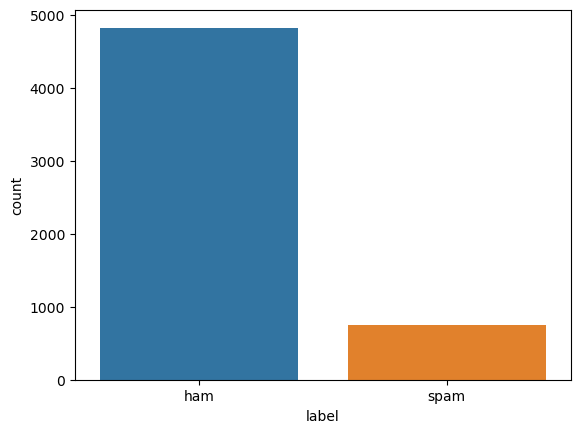

In [6]:
sns.countplot(x = y);

In [7]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


<b>Data Preparation<b>

Data Cleaning

In [8]:
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

In [9]:
swords = stopwords.words('english')

ps = PorterStemmer

In [10]:
#Define a function for text cleaning

def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    return tokens3

In [11]:
new_sent = 'It was the expected result. They told the same on fields.'

In [12]:
clean_text(new_sent)

['expected', 'result', 'told', 'fields']

<b>TFIDFVectorization<b>

In [54]:
#Import the class

from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
#Create the object

tfidf = TfidfVectorizer(analyzer=clean_text)

In [56]:
#Perform the operation

x_new = tfidf.fit_transform(x)

In [16]:
x_new.shape

(5572, 7217)

In [17]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [18]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

<b>Encoding of output variable<b>

In [19]:
#Import the class

from sklearn.preprocessing import LabelEncoder

In [20]:
#Create the object

le = LabelEncoder()

In [21]:
#Apply the encoding

y_new = le.fit_transform(y)

In [22]:
y_new

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [24]:
le.inverse_transform([0])

array(['ham'], dtype=object)

In [25]:
le.inverse_transform([1])

array(['spam'], dtype=object)

<b>Cross Validation<b>

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, random_state = 0)

In [28]:
x_train.shape

(4179, 7217)

In [29]:
x_test.shape

(1393, 7217)

<b>Define the neural network model<b>

In [30]:
pip install tensorflow keras -U

In [58]:
from keras.models import Sequential

from keras.layers import Dense

In [32]:
#Create the object of NN model

model = Sequential()

#Create first/input layer

layer1 = Dense(64, input_shape=(7217, ), activation='relu')
model.add(layer1)

#Create the hidden layer

layer2 = Dense(128, activation='relu')
model.add(layer2)

#Create the output layer

layer3= Dense(1, activation='sigmoid') #multiclass: activation - softmax, number of neurons = number of classes
model.add(layer3)

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       461,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470,401 (1.79 MB)

 Trainable params: 470,401 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

<b>Visualize the model<b>

In [34]:
from keras.utils import plot_model

In [38]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [37]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


<b>Compile the model<b>

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#multi-class: loss'categorical_crossentropy'

<b>Train the model<b>

In [44]:
model.fit(x_train.toarray(), y_train, epochs=10, batch_size=10)

Epoch 1/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8846 - loss: 0.3418
Epoch 2/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9919 - loss: 0.0254
Epoch 3/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9983 - loss: 0.0079
Epoch 4/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9998 - loss: 0.0017
Epoch 5/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 6/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9996 - loss: 0.0020
Epoch 7/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9991 - loss: 0.0039
Epoch 8/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9998 - loss: 7.1207e-04
Epoch 9/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9999 - loss: 5.9522e-04
Epoch 10/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9999 - loss: 6.5282e-04


<b>Evaluate the model on testing data<b>

In [47]:
model.evaluate(x_test.toarray(), y_test, batch_size=1)

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0829


[0.1130232885479927, 0.980617344379425]

<b>Prediction on unseen new data<b>

In [48]:
#Dataset: sample.csv

#Location: https://mitu.co.in/dataset

In [49]:
f = open('sample.csv')

In [50]:
new_data = f.readlines()

In [52]:
new_data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a Â£1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [57]:
tfidf.transform(new_data)

<3x7217 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [59]:
tfidf.transform(new_data).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
model.predict(tfidf.transform(new_data).toarray())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


array([[7.4861888e-11],
       [9.9995536e-01],
       [8.4979591e-05]], dtype=float32)

In [62]:
pred = model.predict(tfidf.transform(new_data).toarray())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [63]:
pred[0]

array([7.486189e-11], dtype=float32)

In [64]:
pred[1]

array([0.99995536], dtype=float32)

In [65]:
pred[2]

array([8.497959e-05], dtype=float32)

In [66]:
if pred[0] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['ham']


In [67]:
if pred[1] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['spam']


In [68]:
if pred[2] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['ham']
